<a href="https://colab.research.google.com/github/NitishMamadgi/DT_LSTM_prediction/blob/main/DT_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logistic Regression Validation Accuracy: 0.4883
Logistic Regression Test Accuracy: 0.4975
Logistic Regression Confusion Matrix:
 [[403   0 173]
 [ 18   0   9]
 [405   0 196]]


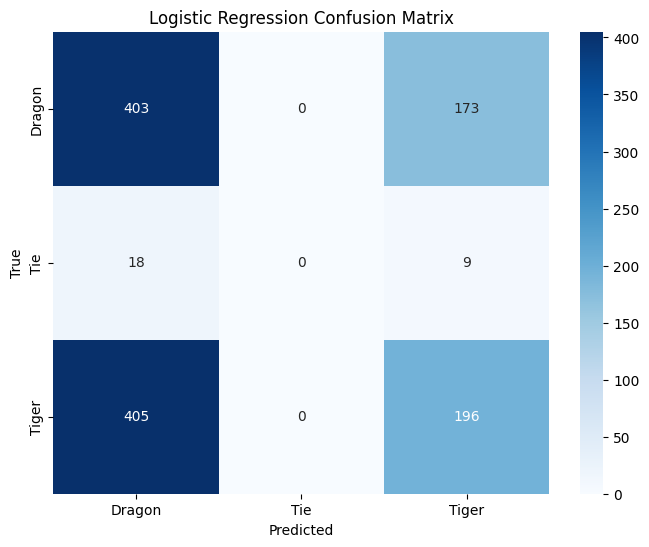

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.70      0.57       576
           1       0.00      0.00      0.00        27
           2       0.52      0.33      0.40       601

    accuracy                           0.50      1204
   macro avg       0.34      0.34      0.33      1204
weighted avg       0.49      0.50      0.47      1204


Random Forest Validation Accuracy: 0.5000
Random Forest Test Accuracy: 0.5025
Random Forest Confusion Matrix:
 [[327   0 249]
 [ 13   0  14]
 [323   0 278]]


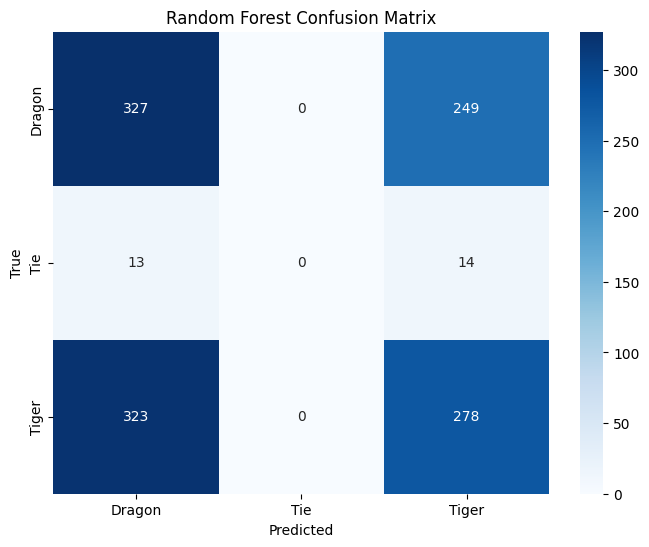

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.57      0.53       576
           1       0.00      0.00      0.00        27
           2       0.51      0.46      0.49       601

    accuracy                           0.50      1204
   macro avg       0.34      0.34      0.34      1204
weighted avg       0.49      0.50      0.50      1204


Support Vector Machine Validation Accuracy: 0.5041
Support Vector Machine Test Accuracy: 0.4784
Support Vector Machine Confusion Matrix:
 [[331   0 245]
 [ 16   0  11]
 [356   0 245]]


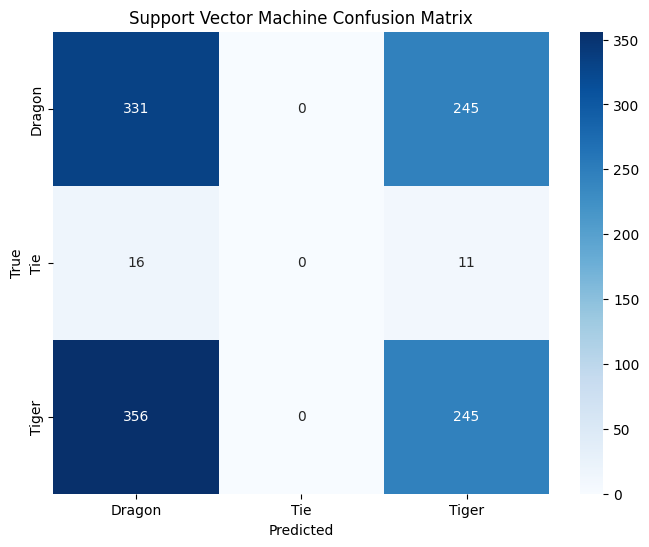

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.57      0.52       576
           1       0.00      0.00      0.00        27
           2       0.49      0.41      0.44       601

    accuracy                           0.48      1204
   macro avg       0.32      0.33      0.32      1204
weighted avg       0.47      0.48      0.47      1204



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
train_df = pd.read_csv('DT_training_dataset.csv')
test_df = pd.read_csv('DT_testing_dataset.csv')

# Remove the 'ID' column
train_df.drop(columns=['ID'], inplace=True)
test_df.drop(columns=['ID'], inplace=True)

# Encode 'Dragon', 'Tiger', and 'Tie' as integers
label_encoder = LabelEncoder()
train_df['Event'] = label_encoder.fit_transform(train_df['Event'])
test_df['Event'] = label_encoder.transform(test_df['Event'])

# Create sequences of 10 events for training
seq_length = 5
def create_sequences(data, seq_length):
    sequences = []
    next_events = []
    for i in range(len(data) - seq_length):
        sequences.append(data['Event'].iloc[i:i + seq_length].values)
        next_events.append(data['Event'].iloc[i + seq_length])
    return np.array(sequences), np.array(next_events)

X_train, y_train = create_sequences(train_df, seq_length)
X_test, y_test = create_sequences(test_df, seq_length)

# Flatten sequences for logistic regression, random forests, and SVM
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Split the training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    print(f"\n{model_name} Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print(f"{model_name} Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

    cm = confusion_matrix(y_test, y_test_pred)
    print(f"{model_name} Confusion Matrix:\n", cm)
    plot_confusion_matrix(cm, label_encoder.classes_, model_name)

    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_test_pred))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=200)
train_and_evaluate(logistic_model, X_train_split, y_train_split, X_val_split, y_val_split, X_test_flat, y_test, "Logistic Regression")

# Random Forest
random_forest_model = RandomForestClassifier()
train_and_evaluate(random_forest_model, X_train_split, y_train_split, X_val_split, y_val_split, X_test_flat, y_test, "Random Forest")

# Support Vector Machine (SVM)
svm_model = SVC()
train_and_evaluate(svm_model, X_train_split, y_train_split, X_val_split, y_val_split, X_test_flat, y_test, "Support Vector Machine")
